Dataset tersedia di: https://www.kaggle.com/kushalvala/concrete ; http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

Concrete Compressive Strength 

---------------------------------

Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def load_data(filename):
    df = pd.read_csv(filename)
    return df

In [24]:
df = load_data('Concrete.csv')

### Statistics sumarry

independen = cement, slag, flyash, water, superplasticizer coarseaggregate, fineaggregate, age

independen = csMPa

In [25]:
df.shape

(1030, 9)

In [26]:
# melihat 5 baris terakhir dari data.


df.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [27]:
# dengan .info() dapat diketahui record data dan keseluruhan record data sudah dalam format numerik

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [28]:
# melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.

df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# DATA PREPARATION

* Memeriksa dan menangani jika ada nilai yang hilang // missing value 
* Memeriksa dan mempelajari lebih lanjut tentang nilai di setiap variabel 
* Memeriksa nilai dan menentukan apakah ingin: memasukkan nilai // imputasi, menghapus entri atau variabel 

### Missing Values

In [29]:
# mengecek data null

df.isna().any()

cement              False
slag                False
flyash              False
water               False
superplasticizer    False
coarseaggregate     False
fineaggregate       False
age                 False
csMPa               False
dtype: bool

In [30]:
# mengecek nilai unik dari tiap variabel dan persentase di tiap variabel

for i in df:
    print('Nilai dari tiap kolom ' + i + ': ' + repr(df[i].nunique()) + '\n' + repr(round(df[i].value_counts(normalize = True)* 100, 2)) + '\n')

Nilai dari tiap kolom cement: 278
362.6    1.94
425.0    1.94
251.4    1.46
310.0    1.36
446.0    1.36
         ... 
313.8    0.10
147.8    0.10
260.9    0.10
136.4    0.10
321.3    0.10
Name: cement, Length: 278, dtype: float64

Nilai dari tiap kolom slag: 185
0.0      45.73
189.0     2.91
106.3     1.94
24.0      1.36
20.0      1.17
         ...  
178.1     0.10
148.9     0.10
98.8      0.10
128.9     0.10
169.4     0.10
Name: slag, Length: 185, dtype: float64

Nilai dari tiap kolom flyash: 156
0.0      54.95
118.3     1.94
141.0     1.55
24.5      1.46
79.0      1.36
         ...  
71.0      0.10
138.0     0.10
166.0     0.10
182.0     0.10
143.2     0.10
Name: flyash, Length: 156, dtype: float64

Nilai dari tiap kolom water: 195
192.0    11.46
228.0     5.24
185.7     4.47
203.5     3.50
186.0     2.72
         ...  
127.0     0.10
166.7     0.10
191.3     0.10
172.4     0.10
177.6     0.10
Name: water, Length: 195, dtype: float64

Nilai dari tiap kolom superplasticizer: 111
0.0  

# DATA EXPLORATORY & VISUALIZATION
lebih mengenal data kita dan menemukan insights dari data

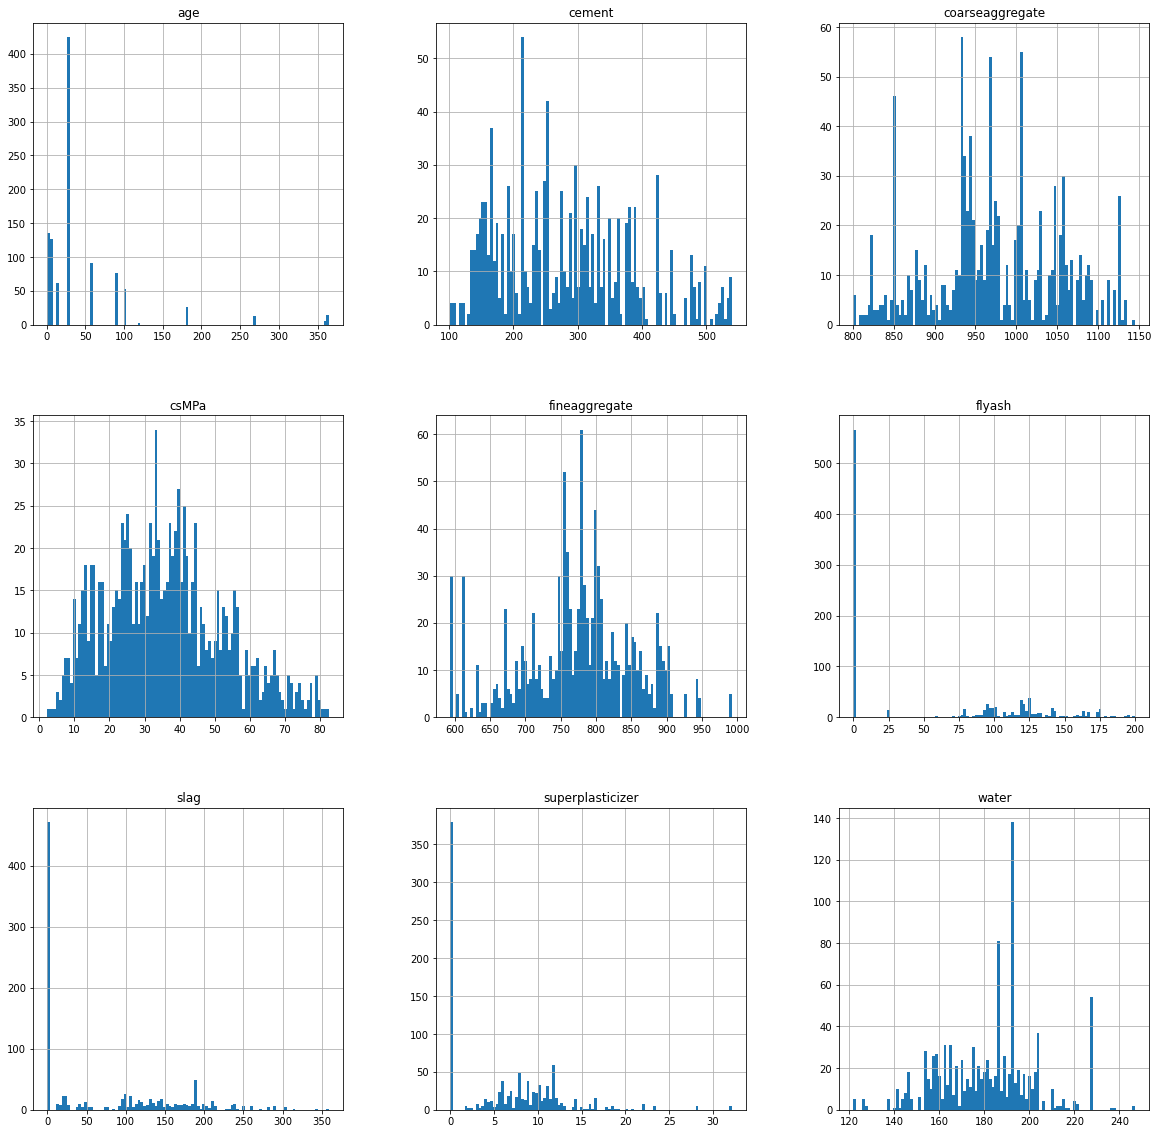

In [31]:
df.hist(bins=100, figsize=(20,20))
plt.show()

In [32]:
# # univariate analysis cement
# # melihat distribusi dari cement

# f = plt.figure(figsize=(12,4))
# f.add_subplot(1,2,1)
# df['cement'].plot(kind='kde')
# f.add_subplot(1,2,2)
# plt.boxplot(df['cement'])
# plt.show()

In [33]:
# for feature in df.dtypes[df.dtypes != object].index:
#     plt.figure(figsize=(15, 5))
#     plt.subplot(1, 3, 1)
#     df.plot(kind='hist', bins=100)
#     # df.hist(bins=15, figsize=(20,20))
#     # plt.subplot(1, 3, 2)
#     sns.violinplot(x=feature, data=df)
#     plt.subplot(1, 3, 2)
#     sns.boxplot(x=feature, data=df)
#     plt.subplot(1, 3, 3)
#     sns.scatterplot(x=feature, y='csMPa', data=df)
#     plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [35]:
# sns.pairplot(df)
# plt.show()

In [36]:
# tidak ada krelasi yang tinggi antara independen variabel (feature)

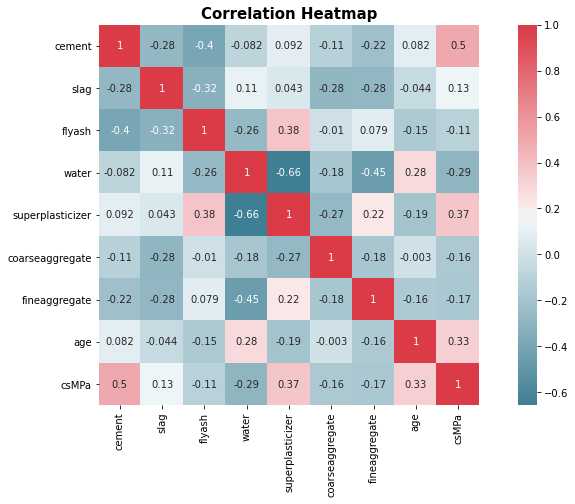

In [37]:
# memeriksa nilai yang sangat berkorelasi (strong // highly corelation) dan mempertimbangkan untuk menghapusnya dari data kami untuk pemodelan.

plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), 
            annot = True, 
            square = True, 
            cmap = sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap', fontweight='bold', fontsize=15)
plt.show()

Tidak ada korelasi yang tinggi antara csMPa dan fitur lain kecuali untuk cement, yang  menjadi sebab untuk kekuatan lebih. semen > makin kuat
age dan superplasticizer adalah dua fitur lainnya yang berkorelasi kuat dengan csMPa.
superplasticizer tampaknya memiliki korelasi tinggi negatif dengan Air, korelasi positif dengan flyash dan fineagregat.

In [38]:
# list untuk memisahkan numeric dan categorial variabel berdasarkan tipe data

num = []
cat = []

for col in df.columns: 
    if df[col].dtype == 'O':
        cat.append(col)
    else: 
        num.append(col)

print('categorial ' + repr(cat))
print('numeric ' + repr(num))

categorial []
numeric ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']


In [39]:
num_data = df[num]


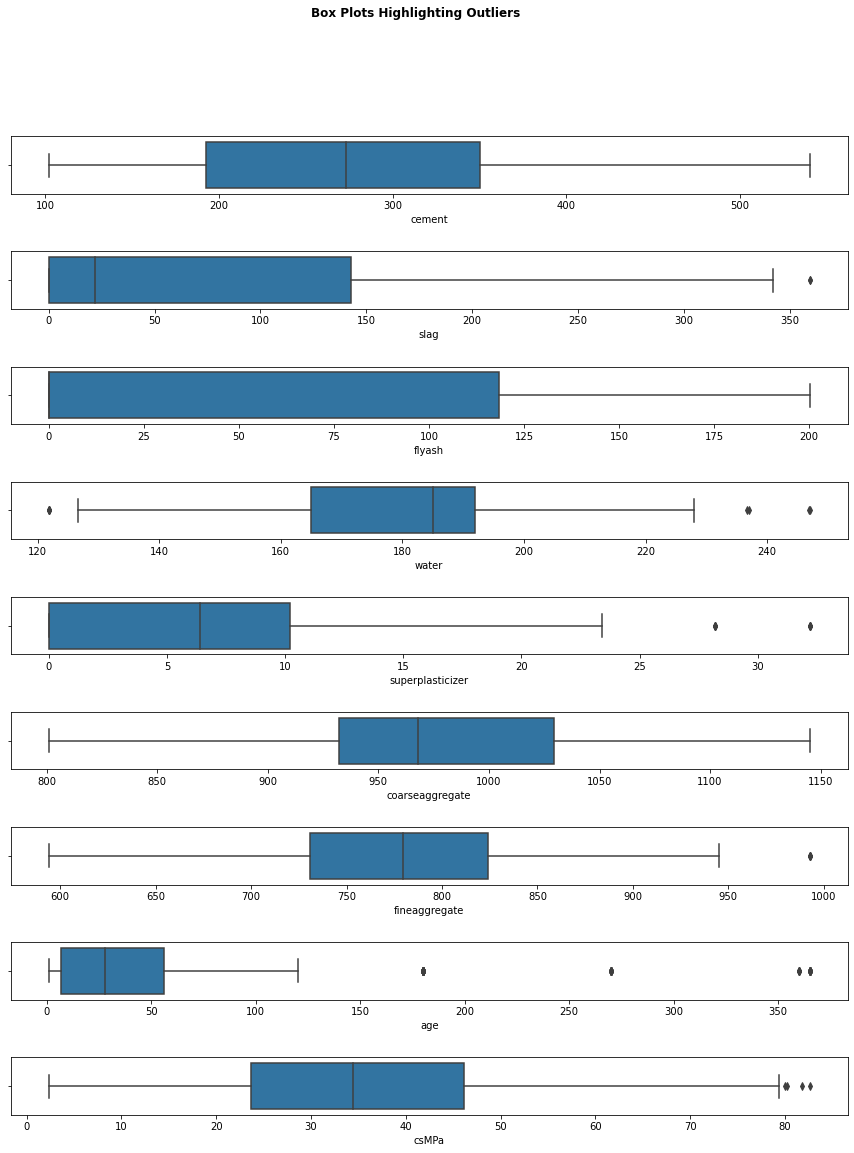

In [40]:
# create a box plot for each continuous variable
nrows = len(num)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(num):
    sns.boxplot(num_data[var], orient='h', ax=axes[i])

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

Di sini Data tidak terdistribusi normal yang berarti kita dapat menggunakan Jangkauan Interkuartil untuk mengukur batas

In [41]:
IQR = df.quantile(0.75) - df.quantile(0.25)
IQR

cement              157.625
slag                142.950
flyash              118.300
water                27.100
superplasticizer     10.200
coarseaggregate      97.400
fineaggregate        93.050
age                  49.000
csMPa                22.425
dtype: float64

In [42]:
lower_bridge= df.quantile(0.25)-(IQR*1.5)
upper_bridge= df.quantile(0.75)+(IQR*1.5)

print(lower_bridge)
print(upper_bridge)

cement              -44.0625
slag               -214.4250
flyash             -177.4500
water               124.2500
superplasticizer    -15.3000
coarseaggregate     785.9000
fineaggregate       591.3750
age                 -66.5000
csMPa                -9.9275
dtype: float64
cement               586.4375
slag                 357.3750
flyash               295.7500
water                232.6500
superplasticizer      25.5000
coarseaggregate     1175.5000
fineaggregate        963.5750
age                  129.5000
csMPa                 79.7725
dtype: float64


In [43]:
lower_bridge = df.quantile(0.25) - (IQR*3)
upper_bridge = df.quantile(0.75) + (IQR*3)

In [44]:
df.loc[df['age']>=150,'age']=150

In [45]:
df.loc[df['superplasticizer']>=25,'superplasticizer']=25

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5240cbcfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f523daaa280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5240cbc3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5240cdd460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5240cddd60>],
 'means': []}

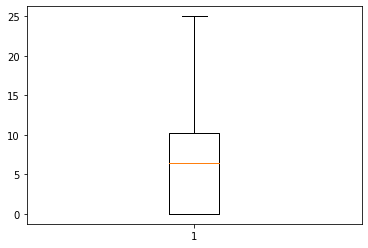

In [46]:
plt.boxplot(df['superplasticizer'])

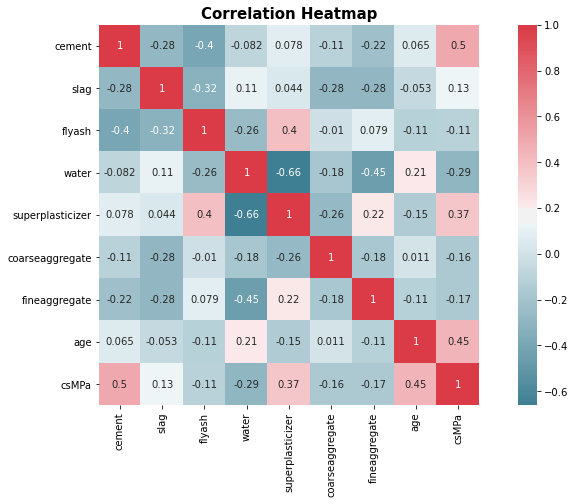

In [47]:
# memeriksa nilai yang sangat berkorelasi setelah dilakukan handling outlier

plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), 
            annot = True, 
            square = True, 
            cmap = sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap', fontweight='bold', fontsize=15)
plt.show()

# Linear Regression

In [48]:
import csv
import random

def train_test_split(filename, split, X_test = [], X_train = [], y_test = [], y_train = []):
# def train_test_split(filename, split, train_set = [], test_set = []):
    with open(filename) as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(1, len(dataset)):
            for y in range(9):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                # test_set.append(dataset[x])
                X_test.append(dataset[x][:9])
                y_test.append(dataset[x][-1])
            else:
                # train_set.append(dataset[x])
                X_train.append(dataset[x][:9])
                y_train.append(dataset[x][-1])

In [49]:
# prepare data

# train_set = []
# test_set = []

X_test = []
X_train = []
y_test = []
y_train = []

split = 0.3

train_test_split('Concrete.csv', split, X_test, X_train, y_test, y_train)
# train_test_split('Concrete.csv', split, train_set, test_set)

print ('Train set size: ' + repr(len(train_set)))
print ('Test set size: ' + repr(len(test_set)))
print ('Test set size: ' + repr(len(y_test)))
print ('Test set size: ' + repr(len(y_train)))

NameError: name 'train_set' is not defined

In [ ]:
# EDITAN UDIN

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# linear regression

In [51]:
x_single = df[["cement"]]
y = df["csMPa"]

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

0.2577102286176425


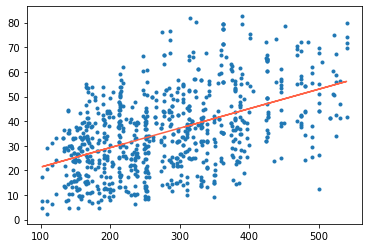

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_single, y, test_size=0.2, random_state=22 )
model_single = LinearRegression()
model_single.fit(x_train, y_train)
y_pred_single = model_single.predict(x_test)
print(model_single.score(x_test, y_test))

plt.scatter(x_train, y_train, marker=".")
plt.plot(x_test, y_pred_single, color="tomato")

# multiple regression

In [54]:
x_multi = df[["cement", "superplasticizer", "age"]]
x_train, x_test, y_train, y_test = train_test_split(x_multi, y, test_size=0.2, random_state=22 )
model_multi = LinearRegression()
model_multi.fit(x_train, y_train)
model_multi.score(x_test, y_test)

0.5792354455000254

# logistic regression

In [55]:
## biining data

In [56]:
df_logis = df[["cement", "superplasticizer", "age", "csMPa"]]
df_logis.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
superplasticizer,1030.0,6.154175,5.786445,0.00,0.000,6.400,10.200,25.0
age,1030.0,39.244660,38.961798,1.00,7.000,28.000,56.000,150.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [57]:
a = 2
b = 24
c = 35
d = 46
e = 83
data_logistic = df_logis.copy()
data_logistic["csMPa_binning"] = pd.cut(df_logis['csMPa'], bins=[a, b,  c, d, e], labels=[1,2,3,4])
data_logistic.head()

,cement,superplasticizer,age,csMPa,csMPa_binning
0,540.0,2.5,28,79.99,4
1,540.0,2.5,28,61.89,4
2,332.5,0.0,150,40.27,3
3,332.5,0.0,150,41.05,3
4,198.6,0.0,150,44.30,3


In [58]:
data_logistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cement            1030 non-null   float64 
 1   superplasticizer  1030 non-null   float64 
 2   age               1030 non-null   int64   
 3   csMPa             1030 non-null   float64 
 4   csMPa_binning     1030 non-null   category
dtypes: category(1), float64(3), int64(1)
memory usage: 33.5 KB


In [59]:
x_logis = data_logistic[["cement", "superplasticizer", "age"]]
y_logis = data_logistic['csMPa_binning']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_logis, y_logis, test_size=0.2, random_state=40)
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
logistic_pred = logistic.predict(x_train)

/home/ryuujin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
logistic.score(x_test, y_test)

0.5194174757281553

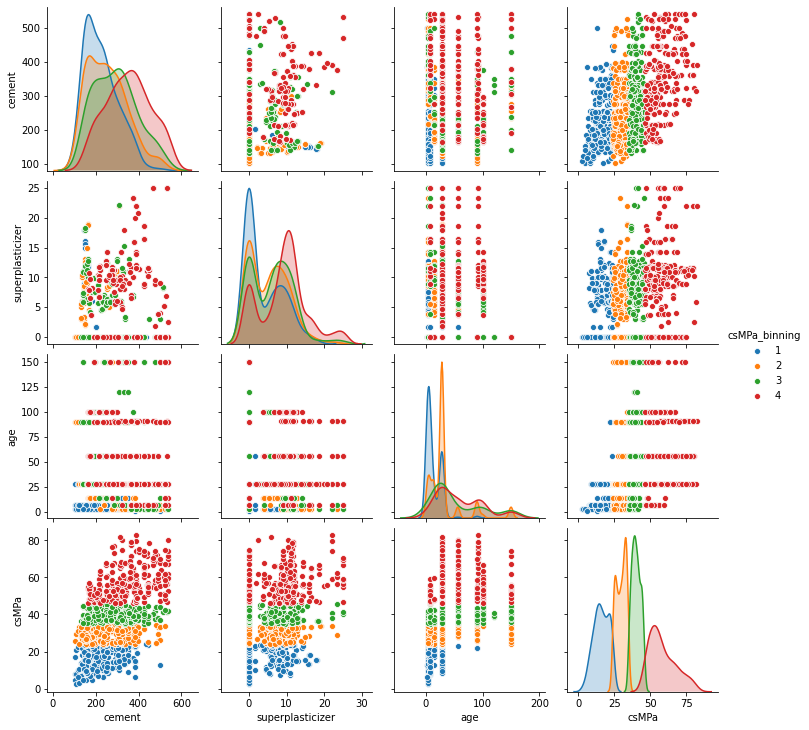

In [62]:
sns.pairplot(data_logistic, hue = "csMPa_binning")